# Deep learning with Pytorch


In [2]:
import torch
from matplotlib import pyplot as plt
import torchvision
import numpy as np

In [3]:
# select the device (in most cases it will be CPU)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
# Hyper-parameters

input_size = 784  # no. of input nodes
hidden_layer_size = 500
num_classes = 10  # 10 potential outputs (digits)
num_epochs = 2
batch_size = 100
learning_rate = 0.001

## load Train and Testing Data


In [5]:
train_dataset = torchvision.datasets.MNIST(
    root="../data/external",
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
)

In [6]:
test_dataset = torchvision.datasets.MNIST(
    root="../data/external", train=False, transform=torchvision.transforms.ToTensor()
)

## data loader


In [7]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

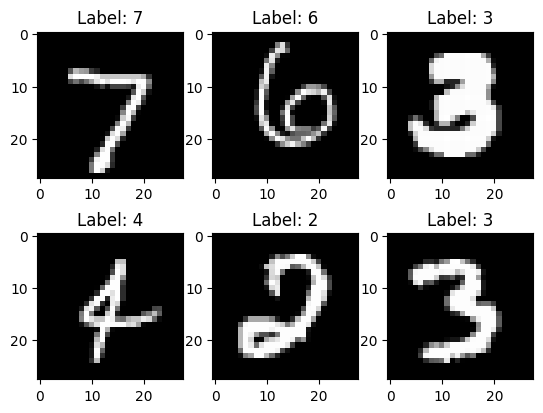

In [8]:
# Plot an example from the dataset
i = 0
fig, ax = plt.subplots(2, 3)
for (images, labels), axes in zip(test_loader, fig.axes):
    images = images[0]  # Take the first image
    labels = labels[0]  # Take the corresponding label
    axes.imshow(images.squeeze().numpy(), cmap="gray")
    axes.set_title(f"Label: {labels.item()}")
    i += 1
    if i > 5:
        break  # Break after plotting the first example

In [9]:
len(images.reshape(28 * 28))

784

## Pytorch Pipeline


In [10]:
class NeuralNet(torch.nn.Module):
    # fully connected Model with one hidden layer and one ReLU activation function
    def __init__(self, input_size, hidden_layer_size, num_classes):
        super().__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_layer_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_layer_size, num_classes),
        )

    def forward(self, x: torch.Tensor):
        return self.network(x)

In [11]:
model = NeuralNet(
    input_size=input_size,
    hidden_layer_size=hidden_layer_size,
    num_classes=num_classes,
)

### Loss Optimier


In [12]:
criterion = (
    torch.nn.CrossEntropyLoss()
)  # loss function good for multiclass classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Traning the model


In [13]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28)  # flatten the image

        # forward pass
        output = model.forward(images)
        # loss calculation
        loss: torch.nn.CrossEntropyLoss = criterion(output, labels)

        # backward pass

        # calculate the gradient
        loss.backward()

        # update the weights
        optimizer.step()

        # zero the gradients after updating
        optimizer.zero_grad()

        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss = {loss}"
            )

Epoch [1/2], Step [100/600], Loss = 0.21554304659366608
Epoch [1/2], Step [200/600], Loss = 0.2827892601490021
Epoch [1/2], Step [300/600], Loss = 0.19034714996814728
Epoch [1/2], Step [400/600], Loss = 0.3428206741809845
Epoch [1/2], Step [500/600], Loss = 0.18373340368270874
Epoch [1/2], Step [600/600], Loss = 0.07616527378559113
Epoch [2/2], Step [100/600], Loss = 0.04785311594605446
Epoch [2/2], Step [200/600], Loss = 0.12369593977928162
Epoch [2/2], Step [300/600], Loss = 0.1800146847963333
Epoch [2/2], Step [400/600], Loss = 0.05109356716275215
Epoch [2/2], Step [500/600], Loss = 0.09983665496110916
Epoch [2/2], Step [600/600], Loss = 0.09103183448314667


## Testing Model


In [14]:
with torch.no_grad():
    no_correct = 0
    n_samples = len(test_loader.dataset)
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28)

        output = model.forward(images)
        # max returns (output_value, index)
        _, predicted = torch.max(output, 1)
        no_correct += (predicted == labels).sum().item()

print(f"Accuracy of model on {n_samples} test images: {(no_correct/n_samples)*100}")

Accuracy of model on 10000 test images: 97.02
